In [1]:
#import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#cek jumlah baris dan kolom
iris.shape

(150, 6)

In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.drop(columns="Id",inplace=True)
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

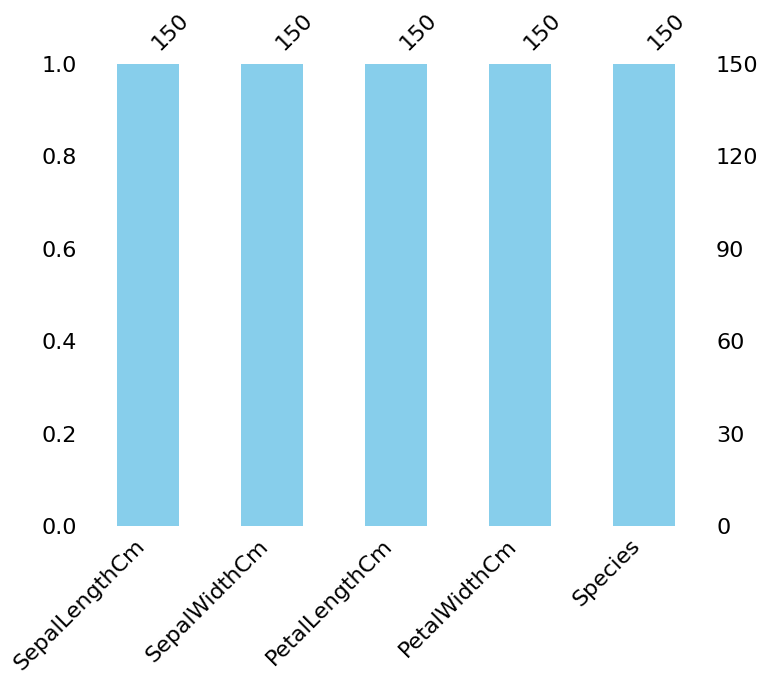

In [8]:
import missingno as msno
msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

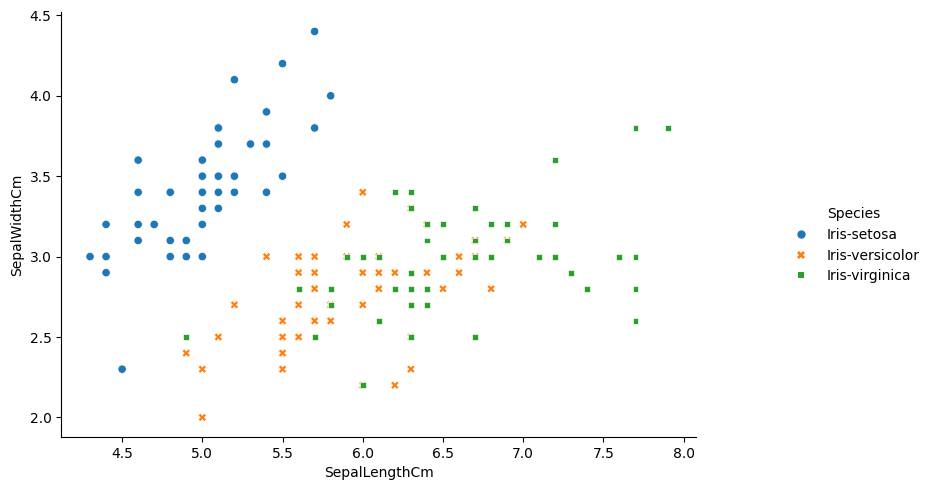

In [10]:
#scatterplot
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

In [33]:
iris_numeric = iris.select_dtypes(include='number')
iris_corr = iris_numeric.corr()
print(iris_corr)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


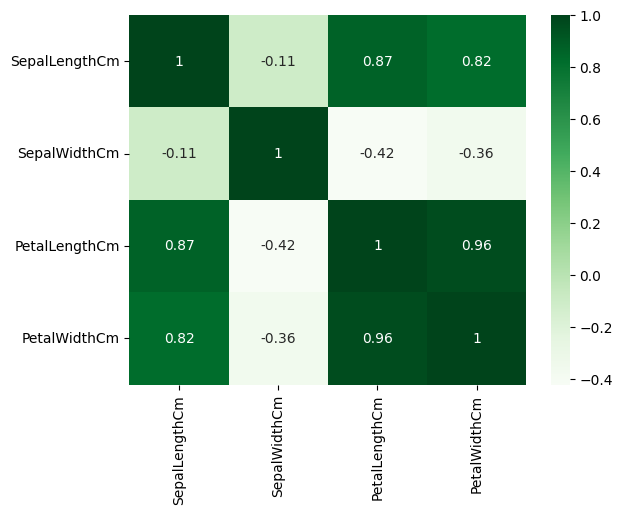

In [34]:
# Pilih hanya kolom numerik
iris_numeric = iris.select_dtypes(include='number')

# Hitung korelasi
iris_corr = iris_numeric.corr()

# Buat heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(iris_corr, annot=True, cmap='Greens')
plt.show()


In [35]:
#pisahkan antara fitur dan label
x = iris.drop('Species', axis = 1)
y = iris['Species']

In [36]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [38]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
#spliting data menjadi train data dan test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of x_test is: {}'.format(x_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of x_train is: (120, 4)
The shape of x_test is: (30, 4)
The shape of y_train is: (120,)
The shape of y_test is: (30,)


In [40]:
#model training
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
#prediksi pada data train
pred_train = model.predict(x_train)

cm = confusion_matrix(y_train, pred_train)

#confusion matrix
print('Confusion matrix Decision Tree\n',cm)
print('')

#akurasi
print('Akurasi pada saat training: {}' .format(accuracy_score(y_train,pred_train))) #confusion matrix

Confusion matrix Decision Tree
 [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]

Akurasi pada saat training: 1.0


In [42]:
#pred pada data test
pred_test = model.predict(x_test)

In [43]:
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')

print('Confusion matrix for DecisionTree\n',cm)
print('')
print('Akurasi pada data test: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall: %.3f' %recall)
print('f1-score: %.3f' %f1)

Confusion matrix for DecisionTree
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Akurasi pada data test: 1.000
precision: 1.000
recall: 1.000
f1-score: 1.000


In [44]:
hf=pd.read_csv('heart_failure.csv')

In [45]:
hf.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [46]:
#cek jumlah baris dan kolom
hf.shape

(299, 13)

In [47]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [49]:
# Hitung korelasi antar kolom
correlation_matrix = hf.corr()
print(correlation_matrix)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.

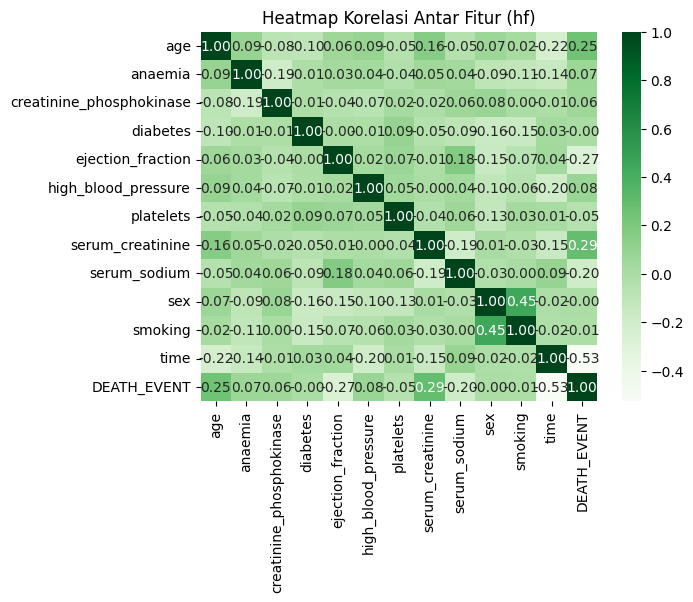

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur (hf)")
plt.show()

In [51]:
#hitung korelasi
correlation_matrix = hf.corr()
print(correlation_matrix['DEATH_EVENT'].sort_values(ascending=False))

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


In [53]:
hf.drop(columns=["diabetes", "sex", "smoking", "platelets", "serum_sodium", "ejection_fraction", "time"] ,inplace=True)
hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
high_blood_pressure         0
serum_creatinine            0
DEATH_EVENT                 0
dtype: int64

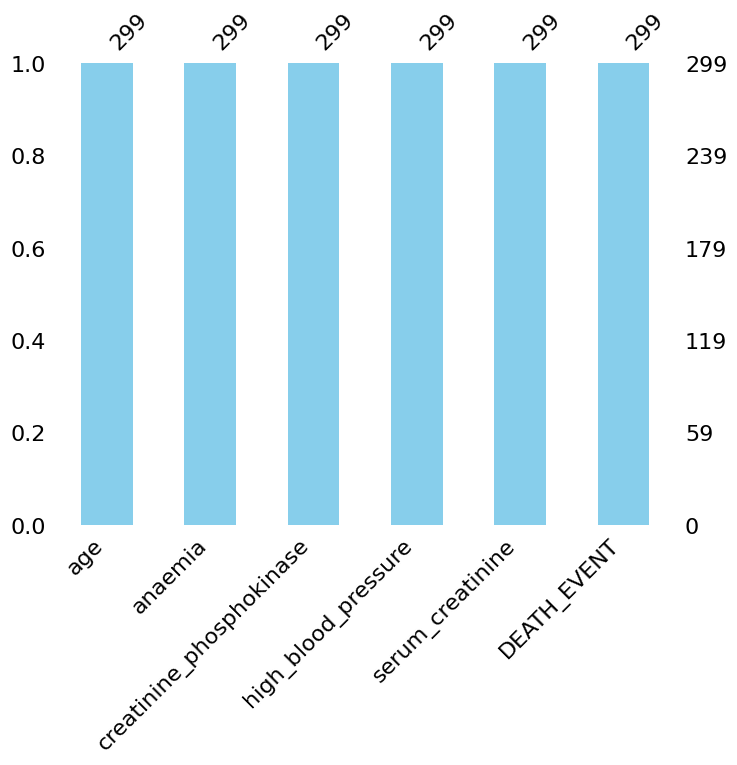

In [54]:
import missingno as msno
msno.bar(hf,figsize=(8,6),color='skyblue')
plt.show()

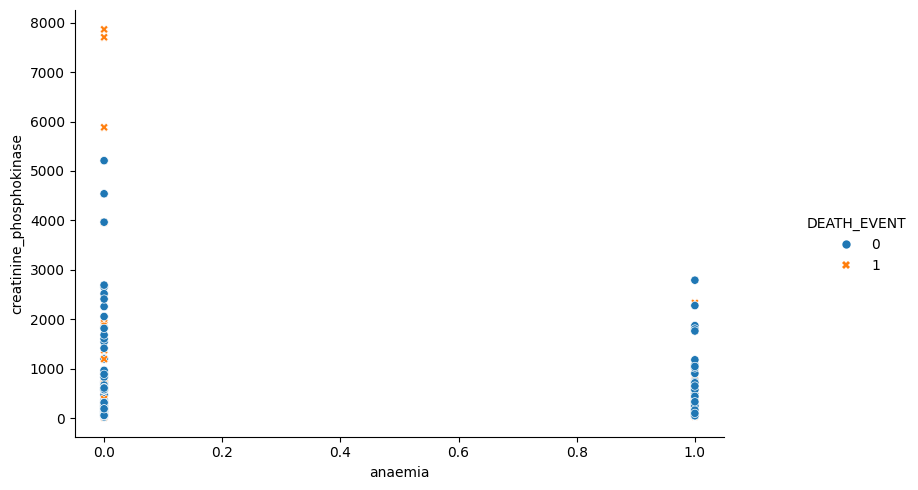

In [56]:
#scatterplot
g=sns.relplot(x='anaemia',y='creatinine_phosphokinase',data=hf,hue='DEATH_EVENT',style='DEATH_EVENT')
g.fig.set_size_inches(10,5)
plt.show()

In [57]:
hf_numeric = hf.select_dtypes(include='number')
hf_corr = hf_numeric.corr()
print(hf_corr)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
high_blood_pressure       0.093289  0.038182                 -0.070590   
serum_creatinine          0.159187  0.052174                 -0.016408   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          high_blood_pressure  serum_creatinine  DEATH_EVENT  
age                                  0.093289          0.159187     0.253729  
anaemia                              0.038182          0.052174     0.066270  
creatinine_phosphokinase            -0.070590         -0.016408     0.062728  
high_blood_pressure                  1.000000         -0.004935     0.079351  
serum_creatinine                    -0.004935          1.000000     0.294278  
DEATH_E

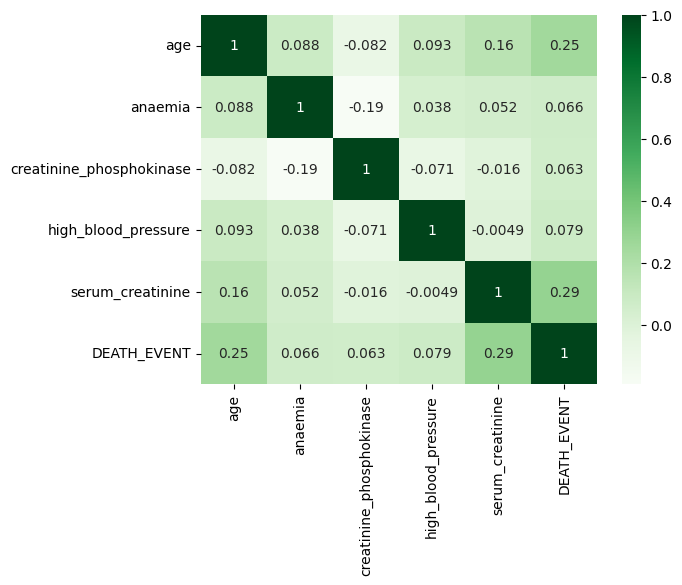

In [58]:
# Pilih hanya kolom numerik
hf_numeric = hf.select_dtypes(include='number')

# Hitung korelasi
hf_corr = hf_numeric.corr()

# Buat heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(hf_corr, annot=True, cmap='Greens')
plt.show()

In [59]:
#pisahkan antara fitur dan label
x = hf.drop('DEATH_EVENT', axis = 1)
y = hf['DEATH_EVENT']

In [60]:
x

,age,anaemia,creatinine_phosphokinase,high_blood_pressure,serum_creatinine
0,75.0,0,582,1,1.9
1,55.0,0,7861,0,1.1
2,65.0,0,146,0,1.3
3,50.0,1,111,0,1.9
4,65.0,1,160,0,2.7
...,...,...,...,...,...
294,62.0,0,61,1,1.1
295,55.0,0,1820,0,1.2
296,45.0,0,2060,0,0.8
297,45.0,0,2413,0,1.4


In [61]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [62]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [63]:
#spliting data menjadi train data dan test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

print('The shape of x_train is: {}'.format(x_train.shape))
print('The shape of x_test is: {}'.format(x_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of x_train is: (239, 5)
The shape of x_test is: (60, 5)
The shape of y_train is: (239,)
The shape of y_test is: (60,)


In [64]:
#model training
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
#prediksi pada data train
pred_train = model.predict(x_train)

cm = confusion_matrix(y_train, pred_train)

#confusion matrix
print('Confusion matrix Decision Tree\n',cm)
print('')

#akurasi
print('Akurasi pada saat training: {}' .format(accuracy_score(y_train,pred_train))) #confusion matrix

Confusion matrix Decision Tree
 [[166   0]
 [  1  72]]

Akurasi pada saat training: 0.99581589958159


In [66]:
#pred pada data test
pred_test = model.predict(x_test)

In [67]:
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average='micro')
recall = recall_score(y_test, pred_test, average='micro')
f1 = f1_score(y_test, pred_test, average='micro')

print('Confusion matrix for DecisionTree\n',cm)
print('')
print('Akurasi pada data test: %.3f' %accuracy)
print('precision: %.3f' %precision)
print('recall: %.3f' %recall)
print('f1-score: %.3f' %f1)

Confusion matrix for DecisionTree
 [[32  5]
 [12 11]]

Akurasi pada data test: 0.717
precision: 0.717
recall: 0.717
f1-score: 0.717
